In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import biweight_scale
from scipy.stats import skewnorm

mad = lambda xx: np.median(np.abs(xx-np.median(xx)))

In [8]:
ntrials=100
dists = np.array([np.random.normal(xx,yy,size=1000) for (xx,yy) in zip(np.random.uniform(-100,100,ntrials),np.random.uniform(0,100,ntrials))])

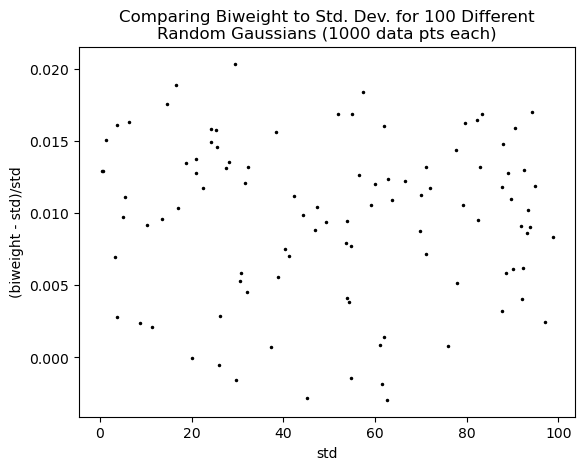

In [17]:
xx = np.std(dists,axis=1)
yy = biweight_scale(dists,axis=1)

plt.figure()
plt.plot(xx, (yy-xx)/xx, 'k.', markersize=3)
plt.ylabel("(biweight - std)/std")
plt.xlabel("std")
plt.title("Comparing Biweight to Std. Dev. for 100 Different\nRandom Gaussians (1000 data pts each)")
plt.show()


In [20]:
ntrials=100
dists = np.array([skewnorm.rvs(aa,size=1000) for aa in np.random.uniform(-100,100,100)])

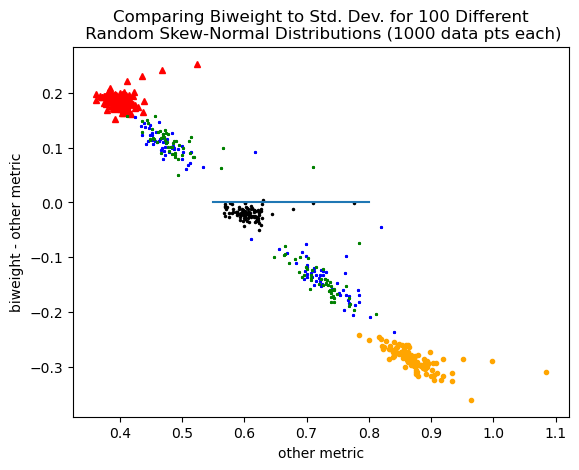

In [37]:
xx = np.std(dists,axis=1)
xx2 = [mad(di) for di in dists]
xx3 = np.percentile(dists,84,axis=1) - np.percentile(dists,50,axis=1)
xx4 = np.percentile(dists,50,axis=1) - np.percentile(dists,16,axis=1)
xx5 = np.sqrt(xx4*xx4+xx3*xx3)
#xx5 = (xx4+xx3)/2
yy = biweight_scale(dists,axis=1)

plt.figure()
plt.plot(xx, yy-xx, 'k.', markersize=3)
plt.plot(xx2, yy-xx2, 'r^', markersize=4)
plt.plot(xx3,yy-xx3,'b*',markersize=2)
plt.plot(xx4,yy-xx4,'g*',markersize=2)
plt.plot(xx5,yy-xx5,'.',color='orange')
tx = np.linspace(0.55,0.8,10)
plt.plot(tx,tx-tx)
plt.ylabel("biweight - other metric")
plt.xlabel("other metric")
plt.title("Comparing Biweight to Std. Dev. for 100 Different\n Random Skew-Normal Distributions (1000 data pts each)")
plt.show()
